In [1]:
import numpy as np, seaborn as sns, pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as img
import glob

Step 1: Obtain face images I1, I2, ..., IM (training faces)

Step 2: Represent each image as a vector.

In [2]:
path = r'./Train1' # use your path
all_images = glob.glob(path + "/*.jpg")

A = []

for image in all_images:
    arr = img.imread(image).flatten()
    A.append(arr)
    
A = np.asarray(A)
A

array([[131, 124, 130, ..., 130, 130, 130],
       [124, 127, 134, ..., 129, 129, 129],
       [130, 126, 138, ..., 130, 130, 130],
       ...,
       [132, 131, 131, ..., 130, 130, 130],
       [130, 127, 131, ..., 129, 129, 129],
       [126, 130, 131, ..., 129, 129, 129]], dtype=uint8)

Step 3: Compute the average face vector Ψ

In [3]:
mean_vector = np.mean(A, axis=0, dtype = np.float64)
mean_vector

array([129.04931071, 130.16675504, 129.71182397, ..., 129.21818664,
       129.21818664, 129.21818664])

Step 4: Subtract the mean face.

In [4]:
A = np.subtract(A, mean_vector)
A

array([[ 1.95068929, -6.16675504,  0.28817603, ...,  0.78181336,
         0.78181336,  0.78181336],
       [-5.04931071, -3.16675504,  4.28817603, ..., -0.21818664,
        -0.21818664, -0.21818664],
       [ 0.95068929, -4.16675504,  8.28817603, ...,  0.78181336,
         0.78181336,  0.78181336],
       ...,
       [ 2.95068929,  0.83324496,  1.28817603, ...,  0.78181336,
         0.78181336,  0.78181336],
       [ 0.95068929, -3.16675504,  1.28817603, ..., -0.21818664,
        -0.21818664, -0.21818664],
       [-3.04931071, -0.16675504,  1.28817603, ..., -0.21818664,
        -0.21818664, -0.21818664]])

Step 6: Get M best eigenvalues and eigenvectors of A * A^T

In [5]:
A = A.T #redefine each image within the column
eig_vals, eig_vects = np.linalg.eig(np.matmul(A.T, A))

Step 7: Get K best eigenvalues and eigenvectors.

In [6]:
#this is our K-value
k = 20
test = pd.DataFrame(eig_vects.T)
test2 = pd.Series(eig_vals)
test['Eigenvalues'] = test2
result = test.nlargest(k, ['Eigenvalues'], keep='first')
result = np.asarray(result)
#converting the 20 A_TA eigenvectors into AA_T eigenvectors 
eigenspace = []
for i in range(0, k):
    x = result[i][0:-1]
    x = np.matmul(A, x)
    eigenspace.append(x)

These are the 20 eigenfaces generated by the program 

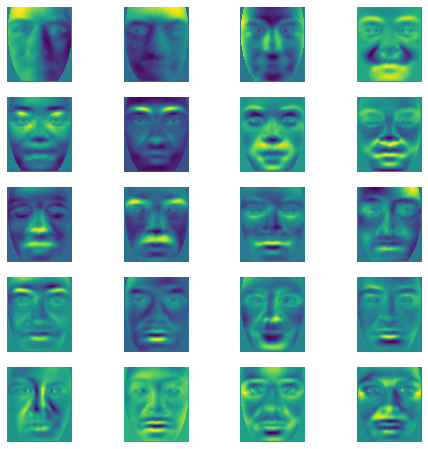

In [7]:
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5
eigenfaces = []
i = 1
for vec in eigenspace:
    face = vec.reshape((150, 130))
    eigenfaces.append(face)
    image = face
    fig.add_subplot(rows, columns, i)
    plt.imshow(image)
    plt.axis('off')
    i += 1

plt.show()

Now on to facial recognition, first we obtain sigma vectors for each of the training images and project the training images onto our eigenspace

In [8]:
#The sigma values are each of the training images projected into the eigenspace
projections = []
for image in all_images:
    arr = img.imread(image).flatten()
    phi = arr - mean_vector
    sigma = []
    for i in range(0, k):
        w = np.matmul(np.transpose(eigenspace[i]), phi)
        sigma.append(w)
    projections.append(sigma)

Here are five faces displayed alongside their eigenfaces, with the linear combination at the end

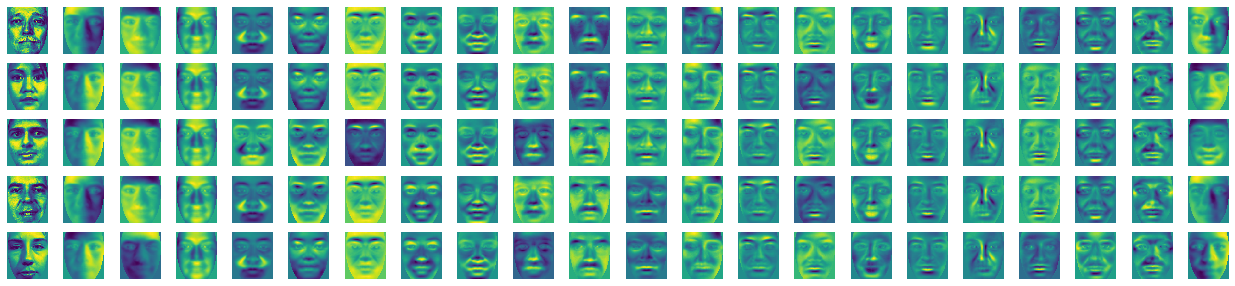

In [9]:
fig = plt.figure(figsize=(22, 5))
columns = 22
rows = 5
for i in range(0,5):
    image = img.imread(all_images[i])
    fig.add_subplot(rows, columns, (i * columns) + 1)
    plt.imshow(image)
    plt.axis('off')
    sigma = projections[i]
    sum_faces = np.zeros((150, 130))
    for j in range(0, 20):
        face = eigenfaces[j] * sigma[j]
        sum_faces += face
        fig.add_subplot(rows, columns, (i * columns) + 1 + j + 1)
        plt.imshow(face)
        plt.axis('off')
    fig.add_subplot(rows, columns, i * columns + columns)
    plt.imshow(sum_faces)
    plt.axis('off')
plt.show()

Now we obtain sigma vectors for each of the test images, and compare them

In [10]:

projections = []
for image in all_images:
    arr = img.imread(image).flatten()
    phi = arr - mean_vector
    sigma = []
    for i in range(0, k):
        w = np.matmul(np.transpose(eigenspace[i]), phi)
        sigma.append(w)
    projections.append(sigma)

test_path = r'./Test1'
test_images = glob.glob(test_path + "/*.jpg")
A = []

imgs = []
for test_image in test_images:
    arr = img.imread(test_image).flatten()
    phi = arr - mean_vector
    sigma = []
    for i in range(0, k):
        w = np.matmul(np.transpose(eigenspace[i]), phi)
        sigma.append(w)
    x = 0
    minimum = float('inf')
    min_index = -1
    for train_image in all_images:
        similarity = np.linalg.norm(np.subtract(sigma, projections[x]))
        if similarity < minimum:
            minimum = similarity
            min_index = x
        x += 1

    test_image_out = img.imread(test_image)
    train_image_out = img.imread(all_images[min_index])
    imgs.append((test_image_out, train_image_out))


Display the results:

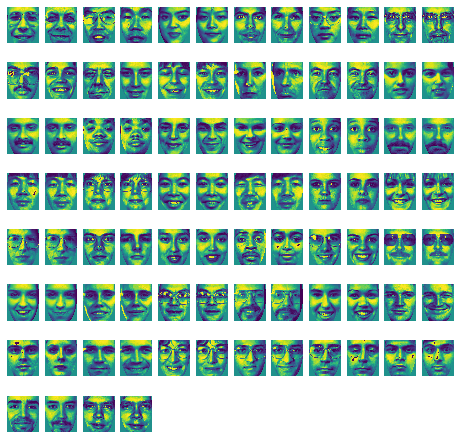

In [13]:
fig = plt.figure(figsize=(8, 8))
columns = 12
rows = 8
x = 0
for i in range(0, len(imgs)):
    img1 = imgs[i][0]
    img2 = imgs[i][1]
    fig.add_subplot(rows, columns, x + 1)
    plt.imshow(img1)
    plt.axis('off')
    fig.add_subplot(rows, columns, x + 2)
    plt.imshow(img2)
    plt.axis('off')
    x += 2

plt.show()